# <center>Digital Image Processing - Problem Set 4</center>

### Student Names: Catherine Diaz & Sorelys Sandoval

### Instructions

This Problem Set covers the topics of Morphological operations, Region filling, Canny edge detection, Hough Transform, Thresholding, Watershed segmentation, $k$-means segmentation.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

In [1]:
# Import all the libraries needed
from os import listdir, path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
# Get all the filenames in the folder images
filenames = listdir('images')

def bgr2hsi(image):
    height = np.size(image, 0)
    width = np.size(image, 1)
    H = np.zeros((height,width)); S = np.zeros((height,width)); I = np.zeros((height,width))
    image2 = image/np.max(image).astype('float32')
    for x in range(0, height):
        for y in range(0, width):
            R = image2.item(x,y,2)
            G = image2.item(x,y,1)
            B = image2.item(x,y,0)
            I.itemset((x,y),(R+G+B)/3)
            if(R==G and G==B):
                S.itemset((x,y),0)
                H.itemset((x,y),0)
            else:
                w = np.arccos(0.5*((R-G)+(R-B))/(np.sqrt((R-G)*(R-G) + ((R - B)*(G - B)))))
                if(G >= B):
                    H.itemset((x,y),w)
                else:
                    H.itemset((x,y),2*np.pi-w)                    
                if(I[x,y]>0):
                    S.itemset((x,y), 1 - np.amin([R,G,B])/I.item(x,y))
                else:
                    S.itemset((x,y),0)
    return H, S, I

def hsi2rgb(H, S, I):
    height = np.size(H, 0)
    width = np.size(H, 1)
    R = np.zeros((height,width))
    G = np.zeros((height,width))
    B = np.zeros((height,width))
    for x in range(0, height):
        for y in range(0, width):
            h = H.item(x,y)
            s = S.item(x,y)
            i = I.item(x,y)
            if(h == 0):
                R.itemset((x,y),i+2*i*s)
                G.itemset((x,y),i-i*s)
                B.itemset((x,y),i-i*s)
            elif(h > 0 and h < 2*np.pi/3):
                R.itemset((x,y),i + i*s*np.cos(h)/np.cos(np.pi/3-h))
                G.itemset((x,y),i + i*s*(1 - np.cos(h)/np.cos(np.pi/3-h)))
                B.itemset((x,y),i-i*s)
            elif(h == 2*np.pi/3):
                R.itemset((x,y),i - i*s)
                G.itemset((x,y),i + 2*i*s)
                B.itemset((x,y),i - i*s)
            elif(h > 2*np.pi/3 and h < 4*np.pi/3):
                R.itemset((x,y),i - i*s)
                G.itemset((x,y),i + i*s*np.cos(h-2*np.pi/3)/np.cos(np.pi-h))
                B.itemset((x,y),i + i*s*(1 - np.cos(h-2*np.pi/3)/np.cos(np.pi-h)))
            elif(h == 4*np.pi/3):
                R.itemset((x,y),i - i*s)
                G.itemset((x,y),i - i*s)
                B.itemset((x,y),i + 2*i*s)
            else:
                R.itemset((x,y),i + i*s*(1 - np.cos(h-4*np.pi/3)/np.cos(5*np.pi/3-h)))
                G.itemset((x,y),i - i*s)
                B.itemset((x,y),i + i*s*np.cos(h-4*np.pi/3)/np.cos(5*np.pi/3-h))
    return cv2.merge((R,G,B))

## Problem 1

Write a function that performs the following sequence of morphological operations on a binary image and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Erode the input image.
3. Dilate the result of b.
4. Dilate the result of c.
5. Erode the result of d.

Write a second function that performs the following operations and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Perform opening of the input image.
3. Compute the closing of the result from b.

Apply both functions to the image <tt>noisy_fingerprint.jpg</tt>. Discuss the differences and similarities between the final results of using both functions.


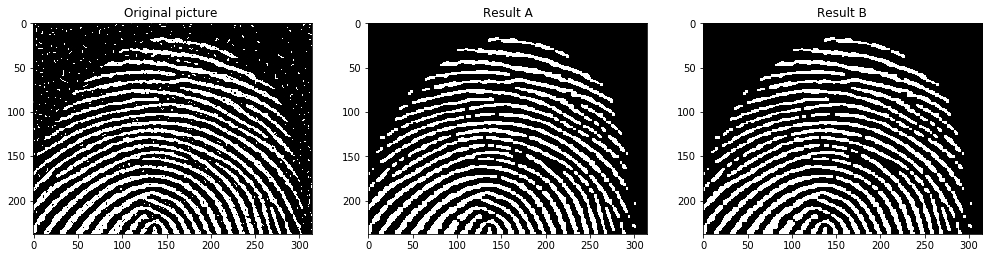

In [235]:
"""Esta función realiza una serie de transformaciones morfologicas basicas"""
def fun1(image):
    struc = np.ones((3,3),np.uint8)
    erosion = cv2.erode(image,struc,iterations = 1)
    dilation = cv2.dilate(erosion,struc,iterations = 1)
    dilation2 = cv2.dilate(dilation,struc,iterations = 1)
    erosion2 = cv2.erode(dilation2,struc,iterations = 1)
    return erosion2

"""Esta funcion aplica combinaciones de transfomaciones por funciones que hacen el procedimiento mas corto"""
def func(image):
    struc = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, struc)
    close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, struc)
    return close

img = cv2.imread("images/noisy_fingerprint.jpg",0);
plt.figure(figsize=(17,17))
plt.subplot(1,3,1)
plt.title("Original picture ")
plt.imshow(img,cmap = 'gray');

"""Grafica de los resultados de pasar la imagen por la primera funcion"""
resulta=fun1(img)
plt.subplot(1,3,2)
plt.title("Result A")
plt.imshow(resulta, cmap='gray')

"""Grafica los resultados de pasar la imagen por la segunda funcion"""
resultb=func(img)
plt.subplot(1,3,3)
plt.title("Result B")
plt.imshow(resultb, cmap='gray')

<p><em><strong>Funcionalidad del c&oacute;digo: </strong></em>Dos funciones transforman de forma id&eacute;ntica una imagen de entrada por medio de operaciones morfol&oacute;gicas. Ambas funciones hacen uso del mismo elemento estructurante cuadrado que se menciona en los requerimientos. La primera funci&oacute;n erosiona la imagen de entrada y posteriormente dilata dos veces este resultado, por ultimo erosiona de nuevo el resultado de las dilataciones. La segunda funci&oacute;n realiza b&aacute;sicamente lo mismo que la primera, pero vali&eacute;ndose de funciones que realizan dilataciones y erosiones seguidas autom&aacute;ticamente. Estas son primero un &ldquo;opening&rdquo; y luego un &ldquo;closing&rdquo;. Las im&aacute;genes resultantes por las modificaciones de cada funci&oacute;n se grafican una al lado de la otra.</p>
<p><em><strong>Funciones empleadas y descripci&oacute;n: </strong></em></p>
<p>La funci&oacute;n <strong>cv2.erode() </strong>realiza la operaci&oacute;n morfol&oacute;gica de erosi&oacute;n. Esta recibe como primer argumento la imagen, y como segundo argumento el elemento estructural. Por ultimo esta admite el n&uacute;mero de iteraciones que se deben realizar.</p>
<p>La funci&oacute;n<strong> cv2.dilate()</strong> requiere de los mismos argumentos ya mencionados que la de erosi&oacute;n para funcionar, con la clara diferencia que est&aacute; en lugar de erosionar la entrada la dilata.</p>
<p>Las funciones de dilatar y erosionar son opuestas. Mientras que la erosi&oacute;n elimina bordes reduciendo el tama&ntilde;o de la imagen y eliminando peque&ntilde;os detalles (siendo as&iacute; muy &uacute;til para eliminar ruido), la dilataci&oacute;n incrementa el tama&ntilde;o de las figuras que afecta, por lo que usualmente se complementa con la erosi&oacute;n para eliminar ruido en im&aacute;genes. La erosi&oacute;n elimina el ruido y la dilataci&oacute;n devuelve la imagen a un mejor tama&ntilde;o.</p>
<p><strong><em>An&aacute;lisis:</em></strong> Como era de esperarse los resultados de ambas funciones son iguales. No se aprecian diferencias notables entre las imagines resultantes, lo que se puede atribuir a que ambas funciones realizan las mismas modificaciones a la imagen de entrada, pero de diferente forma.</p>

## Problem 2

Write a function that implements the region filling function discussed in class.
In this function you will need to use an interactive plot, so we need to disable <tt>inline</tt> plotting. This can be done with the following code:


The algorithm should proceed as follows:

1. Open and display the input binary image.
2. Using the <tt>plt.ginput</tt> function, specify a pixel within the region that you want to fill. Record the $(x, y)$ coordinate of the selected pixel.
3. Generate $X_0$, a binary image whose size is equal to the size of the input image. The pixel at the coordinate selected in the previous step should be set to 1, all other pixels should be set to zero.
4. Compute $X_k$ according to the following equation. Repeat until convergence, i.e. $X_k = X_{k-1}$
\begin{equation}
X_k=(X_{k-1} ⊕ B) ∩ A^c
\end{equation}

5. Compute the union between the final $X_k$ and the original image to fill the region.

Apply your function to the image <tt>spheres.jpg</tt> to fill in all the black circles.


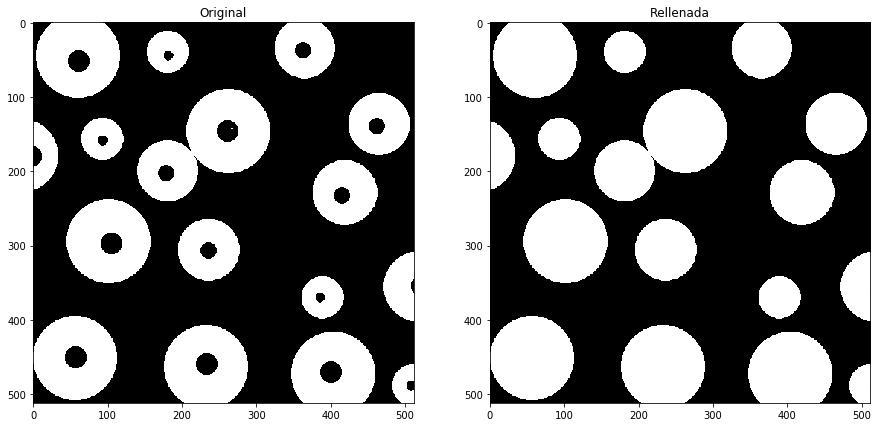

In [218]:
%matplotlib qt
def rellenar(image):
    """ Función que rellena una región
    Input:  image: numpy array con la imagen (binaria).
    ======
    
    Output:   out: numpy array con la imagen rellenada.
    ======
    """
    fig = plt.figure(); plt.imshow(image,cmap='gray'); plt.title('Selecciona una coordenada') # 1
    c= plt.ginput(1)                                                                          # 2
    xcoord= int(round(c[0][0])); ycoord=int(round(c[0][1])) #2+ Redondear coordenada de entrada
    X = np.zeros((image.shape[0], image.shape[1]),dtype=np.uint8); X[ycoord,xcoord]=255       # 3
    B = 255*cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)).astype(np.uint8) #E. Estructurante
    A = image.copy(); A_C= (255-A) # Complemento de la imagen
    convergencia = False                                                                      # 4
    while(not(convergencia)):
        x_k_1 = X.copy()
        X = cv2.dilate(X,B,iterations=1)
        X = np.bitwise_and(X,A_C)
        if(np.array_equal(x_k_1,X)):
            convergencia= True
    out = np.bitwise_or(X,A)
    plt.close(fig)
    return out

img = cv2.imread('images/spheres.jpg',0)
filled_img = rellenar(img)
    
for i in range(16):
    filled_img = rellenar(filled_img)

plt.figure(figsize=(15,10));
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray');plt.title('Original');
plt.subplot(1,2,2); plt.imshow(filled_img,cmap='gray'); plt.title('Rellenada') 

<p><em><strong>Funcionalidad:</strong></em> La imagen de esferas es leída y enviada a la función rellenar 17 veces para así rellenar cada uno de los huecos en cada iteración. Cada ciclo abre una ventana con la imagen rellena hasta ese ciclo y permite que el usuario ingrese una coordenada del hueco a rellenar en ese ciclo. Al final se muestra la imagen original y la rellenada.</p>
    
<p><em><strong>Funciones usadas y descripciones:</strong></em></p>
<p>El comportamiento de la función rellenar se basa en los pasos descritos para este problema. Cabe destacar que fue necesario instalar la librería PyQt4 para buen el funcionamiento de las ventanas.<br><br>
1. Se abre una ventana mostrando la imagen ingresada<br>
2. Usando la función <tt>plt.ginput</tt>, se optiene la coordenada que el usuario quiere rellenar. Esta entrada es redondeada y convertida a entero para que sirva como indice de matriz $(x, y)$ en el punto donde se quiere rellenar.<br>
3. Se crea la matriz $X_0$, una imagen binaria del mismo tamaño que la entrada y donde el punto $(x, y)$ es blanco (255) y el resto es negro (0). También se crea el elemento estructurante <tt>cv2.getStructuringElement()</tt> en donde se le indica que su tamaño será de 3x3. Para finalizar esta etapa se crea el vector A que es una copia de la imagen de entrada y al que se le saca su complemento.<br>
4. Se crea una bandera que indique la convergencia del método iterativo ($X_k = X_{k-1}$). Se iterará mientras que convergencia sea falsa, haciendo las operaciones indicadas en la ecuación:
\begin{equation}
X_k=(X_{k-1} ⊕ B) ∩ A^c
\end{equation}
Revisando en cada ciclo si la condición de convergencia ya se cumplió.<br>
5. Cuando se obtiene la condición de convergencia se procede a unir $X_k$ con la imagen de entrada y se cierra la ventana deonde se graficaba la imagen.<br></p>
<p>Como la función solo rellena un hueco y la imagen spheres.jpg tiene 17, entonces es necesario llamar la función 17 veces, teniendo en cuenta que se le ingresa la imagen previamente rellenada a cada nuevo ciclo. Si todos los puntos ingresados estaban dentro de los huecos a rellenar esta operación será como la ejemplificada en las imagenes que se conservan al final (original y rellenada). Si se coloca la coordenada en la region de fondo negro entonces claramente se rellenará con blanco esa región, pero el objetivo de este punto es solo rellenar los huecos.</p>

## Problem 3

Connected component labeling (also known as connected component analysis, blob extraction, region labeling, blob discovery, or region extraction) is an algorithm that uniquely labels connected components. The definition of connected components depends on the type of pixel adjacency used (pixel adjacency is defined and described in the book). In this problem, we will look at how the result of a connected component labeling algorithm changes when using 4-adjacency or 8-adjacency.

Write a function, <tt>labelConnectedComponents</tt>, which identifies and labels each connected component in a binary image. The function should take as an input the kind of adjacency to be used (either 4-adjacency or 8-adjacency). The function should also display the resulting connected components as shown below (particular coloring may differ). Apply this function to the images crosses.gif and chessboard.gif. Compare the connected components obtained when using 4-adjacency against those obtained when using 8-adjacency. Please comment your results: are these what you expected?

<b>Hint</b>: Use the functions <tt>cv2.findContours</tt> and <tt>cv2.drawContours</tt>. The following Wikipedia article is also a useful reference:
http://en.wikipedia.org/wiki/Connected_Component_Labeling

crosses.png


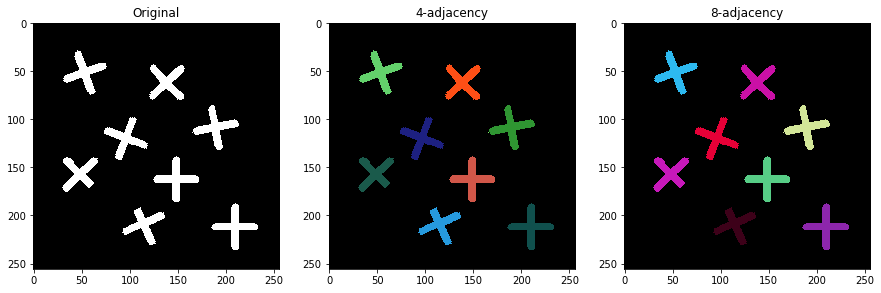

chessboard.png


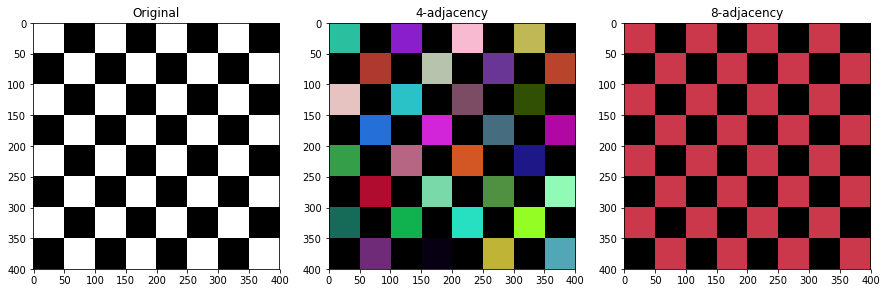

zebra_pattern.jpeg


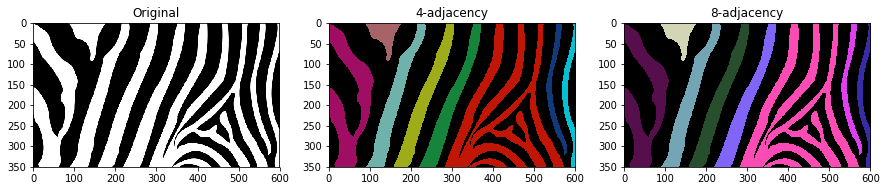

spheres.jpg


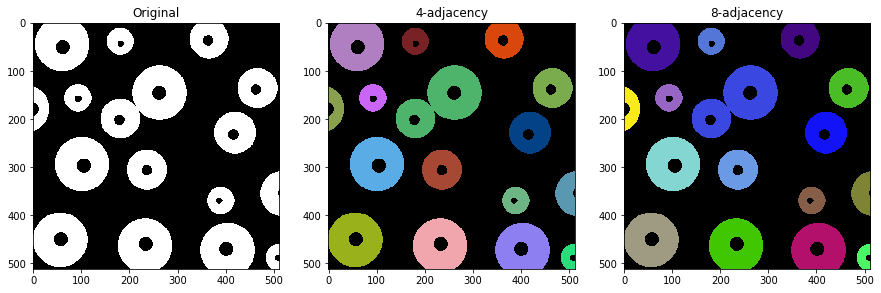

In [261]:
%matplotlib inline
def labelConnectedComponents(image, adj):
    """ Función que identifica y etiqueta cada componente conectada en una imagen
    Input:  image: numpy array con la imagen (escala de grises).
    ======    adj: proximidad (4 u 8).
    
    Output:   out: numpy array con la imagen etiquetada.
    ======
    """
    _, image2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    out = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    h, w = image2.shape
    mask = np.zeros((h+2, w+2), np.uint8)
    for i in range(h):
        for j in range(w):
            if(image2[i,j] == 255):
                r = random.randint(0,255); g = random.randint(0,255); b = random.randint(0,255)
                cv2.floodFill(out, mask,(j,i), (b,g,r), flags = adj)
    return out

img_names = ["crosses.png", "chessboard.png", "zebra_pattern.jpeg","spheres.jpg"]
for name in img_names:
    print name
    img = cv2.imread("images/"+name, cv2.IMREAD_GRAYSCALE)
    img2 = labelConnectedComponents(img, 4)
    img3 = labelConnectedComponents(img, 8)
    plt.figure(figsize=(15,10));
    plt.subplot(1,3,1); plt.imshow(img, cmap = 'gray');plt.title('Original');
    plt.subplot(1,3,2); plt.imshow(img2);plt.title('4-adjacency');
    plt.subplot(1,3,3); plt.imshow(img3);plt.title('8-adjacency');
    plt.show()

<p><em><strong>Funcionalidad y descripción del código:</strong></em> La función labelConnectedComponents() identifica y etiqueta cada componente conectada de una imagen binaria usando grafos con conectividad 4 u 8.
<br>Para ello se empieza extrayendo la región negra de la imagen usando la umbralización binaria de opencv. Después se crea una copia de esta imagen pero se le añaden los canales RGB para su posterior etiquetación. Se inicializan la máscara a usar en la función <strong>cv2.floodFill()</strong>, la máscara debe tener dos pixeles adicionales al tamaño original de la imagen en cada eje. Se barre la imagen umbralizada con la máscara y dandole el valor de (b,g,r) aleatorio, construido previamente, a los pixeles alrededor de un punto blanco hallado en el barrido. La determinación de los puntos alrededor corresponde a cv2.floodFill() cuyo último parámetro corresponde a la conectividad del grafo a usar que a su vez es una parámetro de entrada de nuestra función y puede ser 4 u 8.
<br>

<p><strong><em>Análisis:</em></strong> Se observa en general el comportamiento correcto que se esperaba, sin embargo para el caso de la imagen del tablero de ajedréz el de conectividad 8 rellena todos los blancos con un mismo color y no cada uno diferente como lo hace el de conectividad 4. Esto se explica debido a la manera en que buca cada método.
<br>
Para el caso de conectividad 8 (8-C), el método busca en los tres pixeles vecinos de encima y el de la derecha. En cambio el de conectividad 4 (4-C) solo busca en los pixeles vecinos encima y a la derecha sin tener en cuenta las esquinas. Para explicarlo con el ejemplo del tablero de ajedréz, imaginar que se está centrado justo en esquina del segundo cuadro blanco de la segunda fila. Para 4-C los pixeles vecinos a tener en cuenta tendrán valor de 0 y por lo tanto se moverá hacia la derecha y completará solo el cuadro blanco mencionado, pero para 8-C el pixel de la esquina superior izquierda será 1 por lo que se moverá hacia el primer cuadro de la imagen y así irá rellenando todos los cuadros blancos con un mismo color.

## Problem 4

The blog ‘Steve on Image Processing’ contains useful information about image processing with MATLAB. One of Steve’s posts talks about using morphological operations to identify characters containing a tall vertical segment. The post is at:
http://blogs.mathworks.com/steve/2008/07/14/opening-by-reconstruction/

Replicate the results with Python and OpenCV. You may find that the functions <tt>cv2.findContours</tt> and <tt>cv2.floodFill</tt> are useful for this.

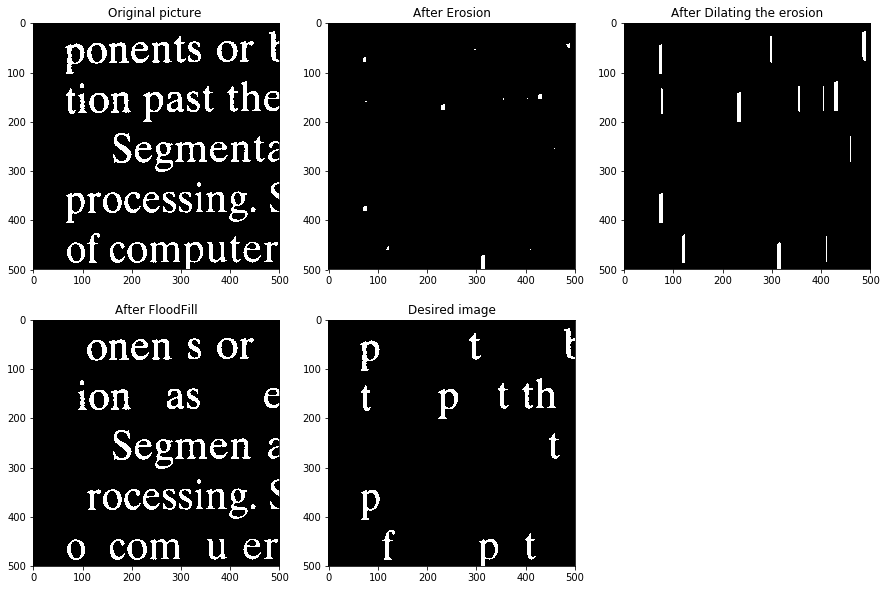

In [239]:
%matplotlib inline
img = cv2.imread("images/steve_blog.png",0);
plt.figure(figsize=(15,10));
plt.subplot(2,3,1)
plt.title("Original picture ")
plt.imshow(img,cmap = 'gray')

struc = np.ones((51,1),np.uint8)
erosion = cv2.erode(img,struc,iterations = 1)
plt.subplot(2,3,2)
plt.title("After Erosion")
plt.imshow(erosion, cmap='gray')

dilation = cv2.dilate(erosion,struc,iterations = 1)
plt.subplot(2,3,3)
plt.title("After Dilating the erosion")
plt.imshow(dilation, cmap='gray')

h, w = img.shape
image = img.copy()
mascara = np.zeros((h+2, w+2), np.uint8) #Mascara con 2 pixeles mas en cada lado que la imagen para poder hacer el floodfill
for i in range(h):
    for j in range(w):
        if(erosion[i,j] > 0.5):
            cv2.floodFill(image, mascara,(j,i), 0) 
out = img - image

plt.subplot(2,3,4)
plt.title("After FloodFill")
plt.imshow(image, cmap='gray')
plt.subplot(2,3,5)
plt.title("Desired image")
plt.imshow(out, cmap='gray')

<p><em><strong>Funcionalidad del c&oacute;digo y descripción: </strong></em>Se intent&oacute; seguir los pasos para eliminar algunos caracteres de un texto, solo se mantuvieron los que presentan una secci&oacute;n de l&iacute;nea recta mayor. La máscara se crea de tamaño de la imagen de entrada más dos pixeles de alto y ancho dado a que así lo requiere <strong>cv2.floodFill() </strong>. Los parámetros para esa funci&oacute;n corresponden primero a la imagen y el segundo a la m&aacute;scara. Esta se desplazó por toda la imagen, como se hace para cualquier aplicación de kernel.</p>
<p>Cv2.floodFill() llena o pinta de negro la secci&oacute;n seg&uacute;n una condici&oacute;n específica de erosi&oacute;n. En nuestro caso corresponde a los puntos blancos observados en la 2da imagen (After Erosion). Por lo tanto el resultado no es la imagen deseada sino el complemento de esta. Así que para finalizar se resta la imagen orginal a la obtenida con cv2.floodFill() para obtener la deseada.</p>

<p><strong><em>Algo curioso:</em></strong> Aunque no era necesario hacer las primeras operaciones que, hacia el due&ntilde;o de la p&aacute;gina, es curioso ver que en la imagen despu&eacute;s de dilatar lo que se erosiono primero, se ven las partes rectas de los caracteres que no son eliminados al final del funcionamiento del programa.</p>

## Problem 5 

Write a function that detects edges in an image using Canny’s method, which is available in the function <tt>cv2.Canny</tt>.
Your function should first smooth the image using a Guassian filter, which you can do with <tt>cv2.GaussianBlur</tt>.
Try out Canny's method with different sizes the smoothing kernel and analyze the results.
Also, try changing the thresholds in the edge detection process. What are the effects of each parameter?

c:\python27\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


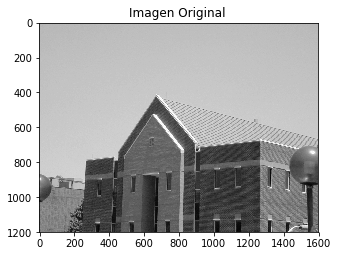

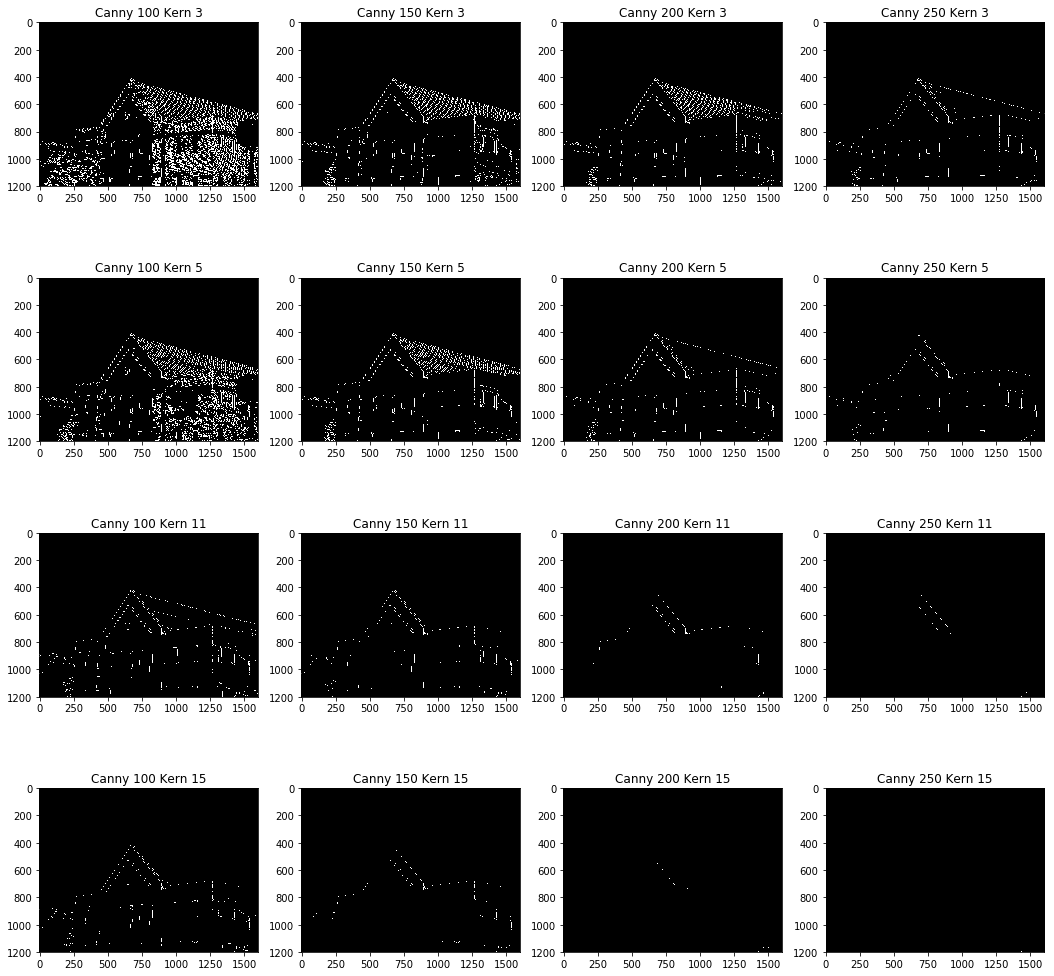

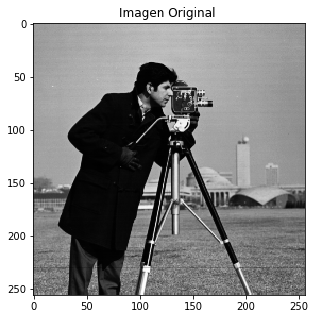

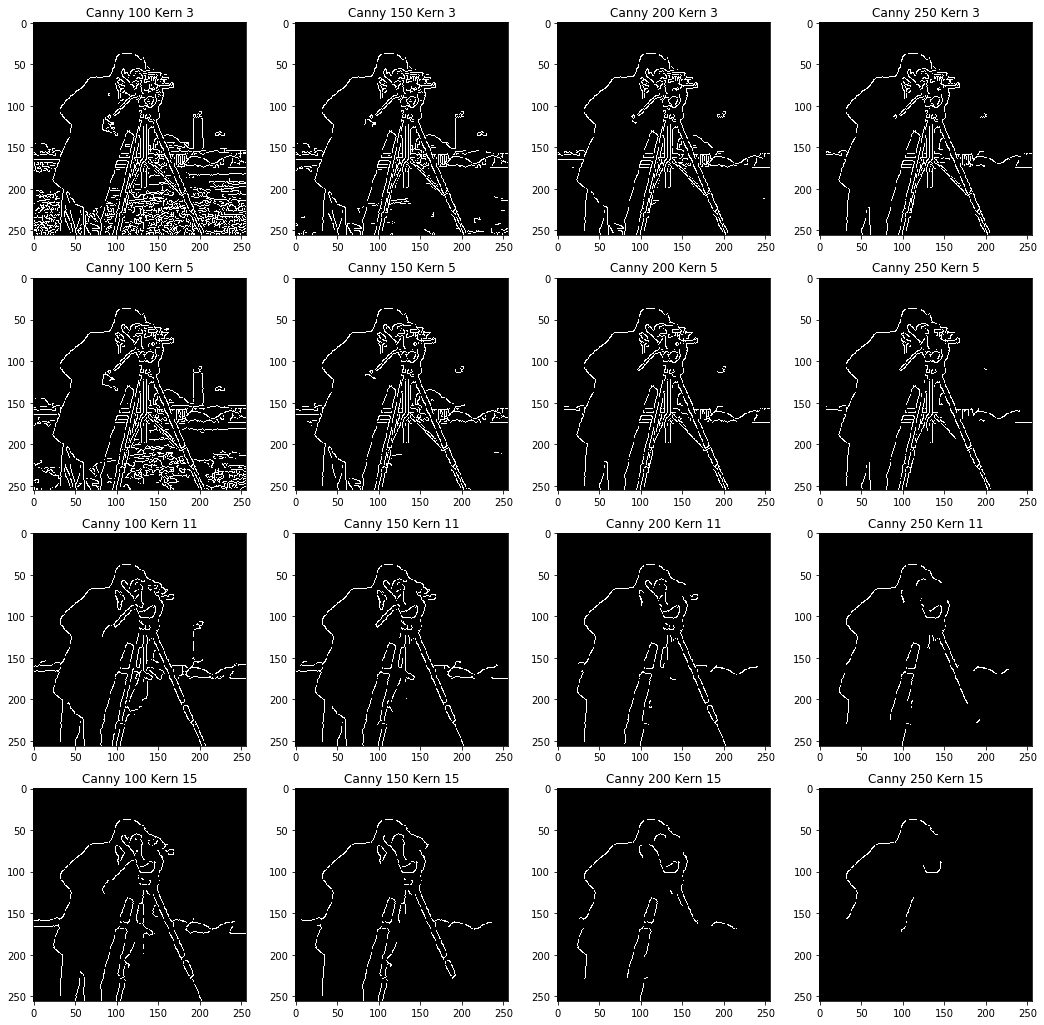

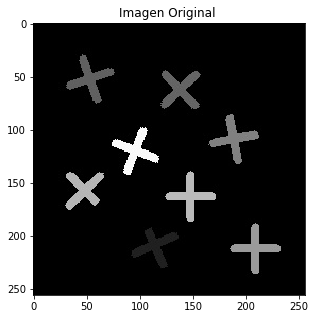

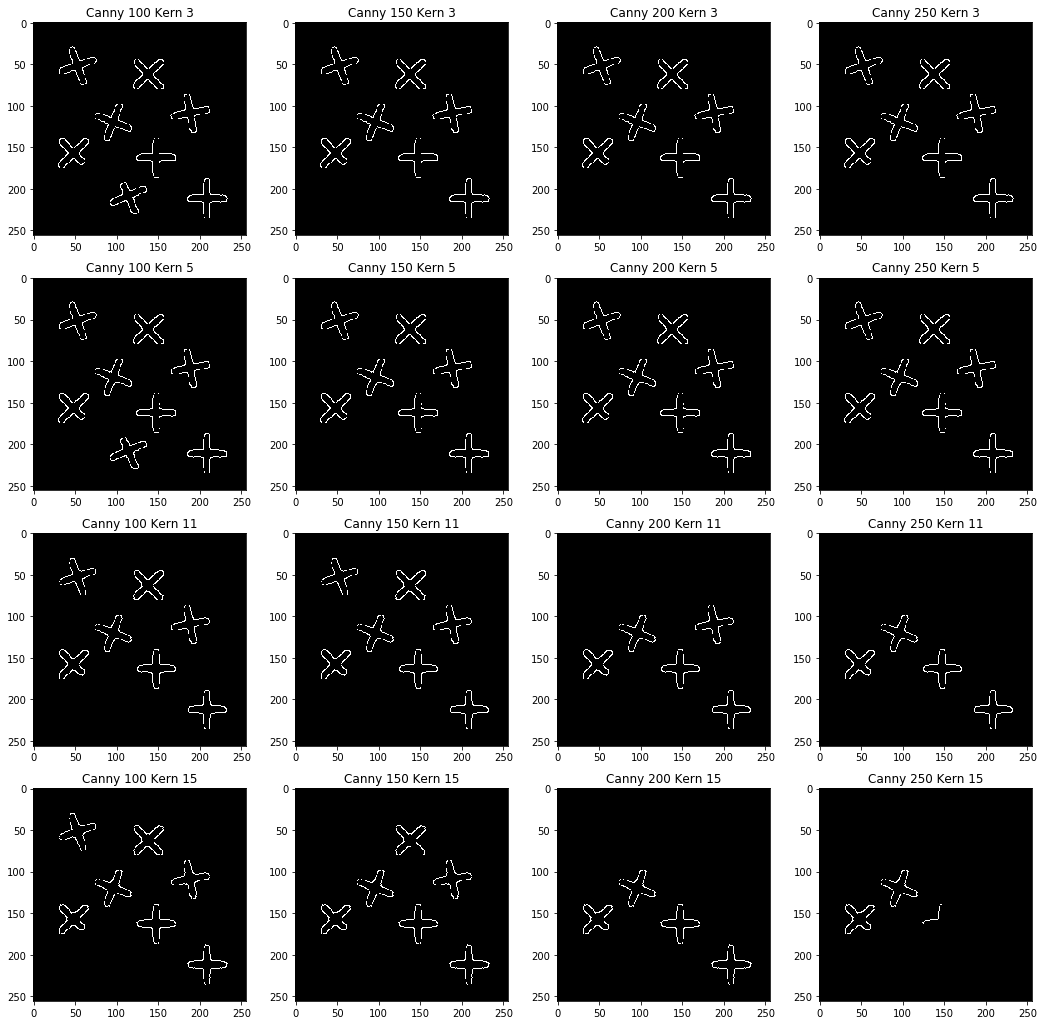

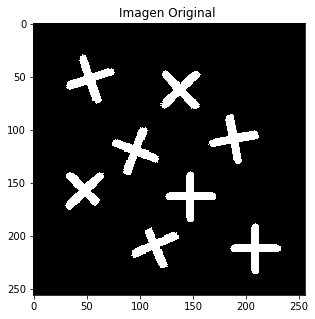

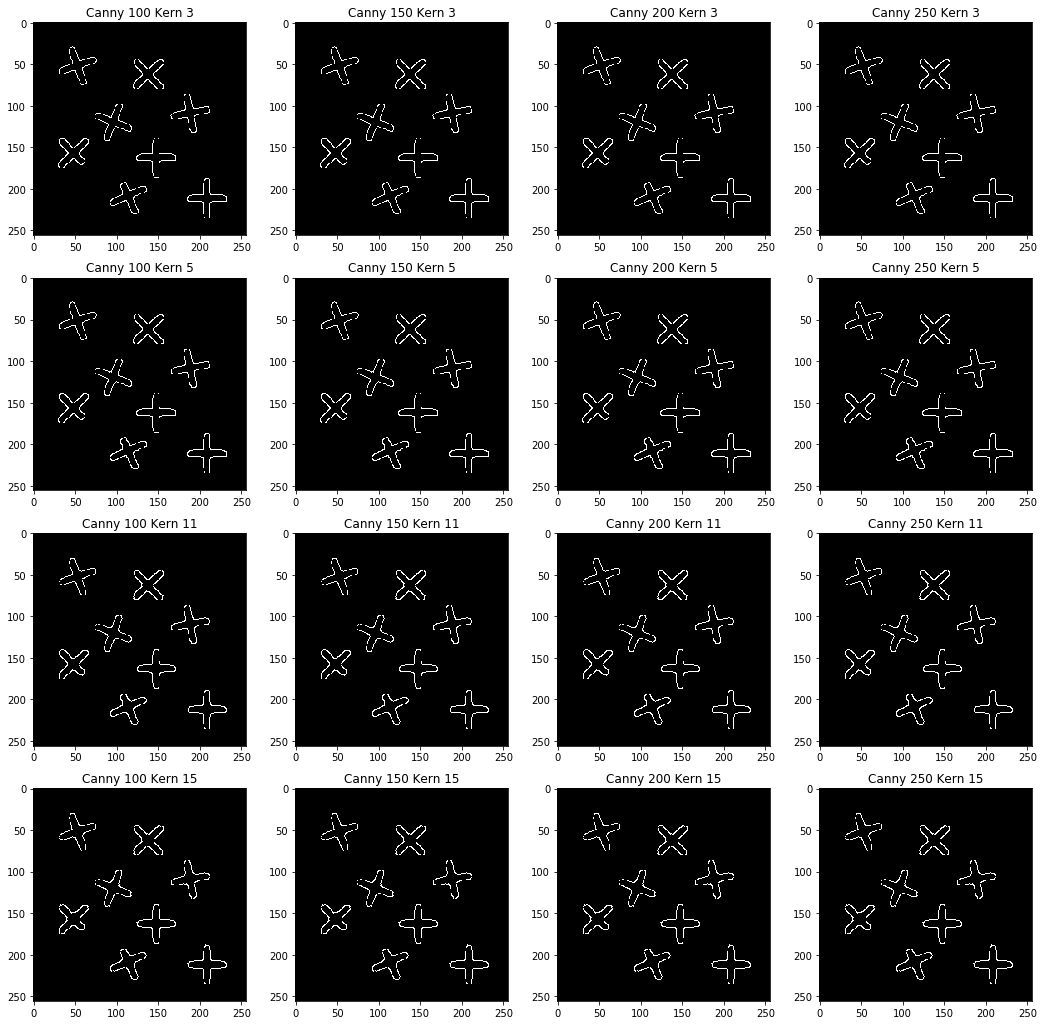

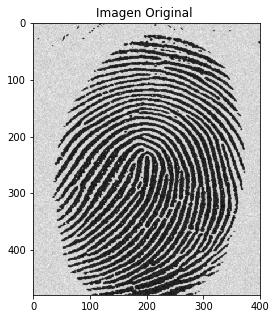

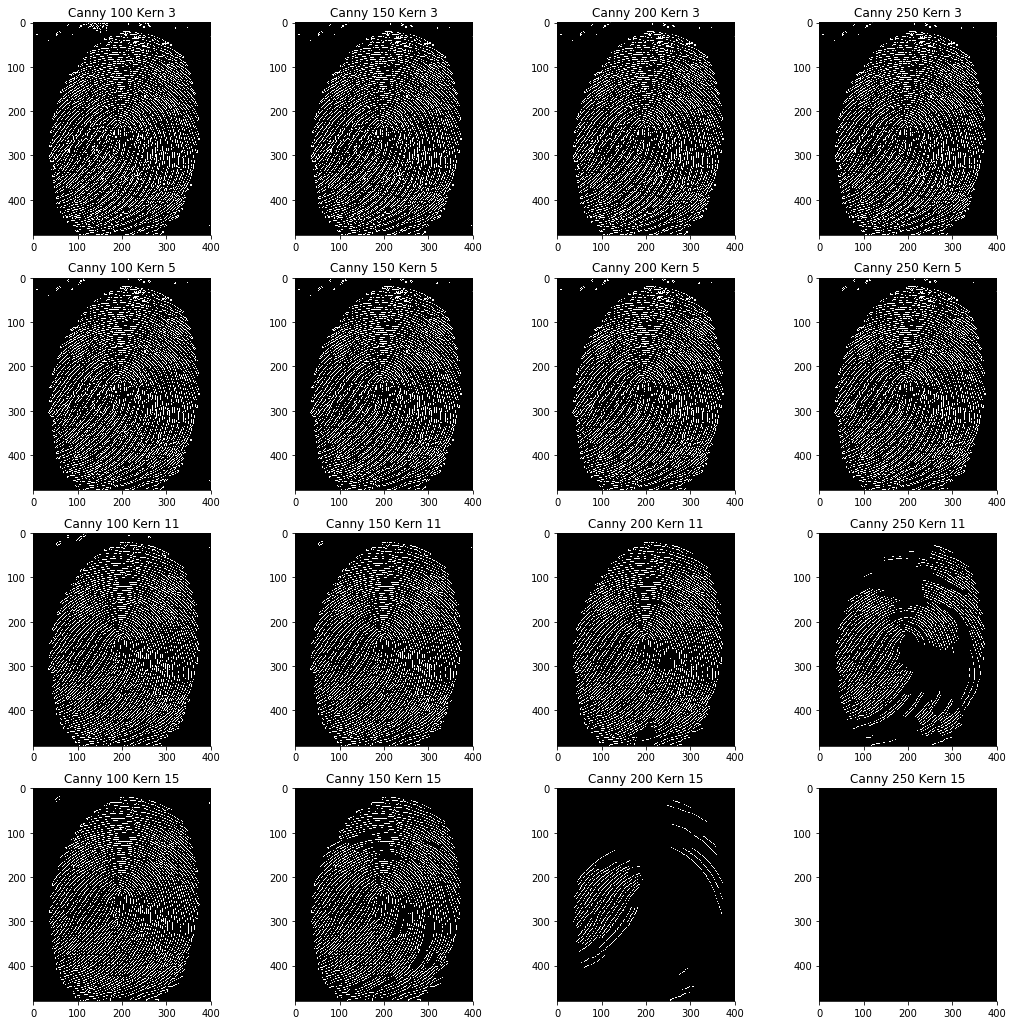

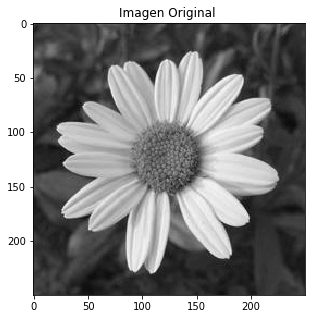

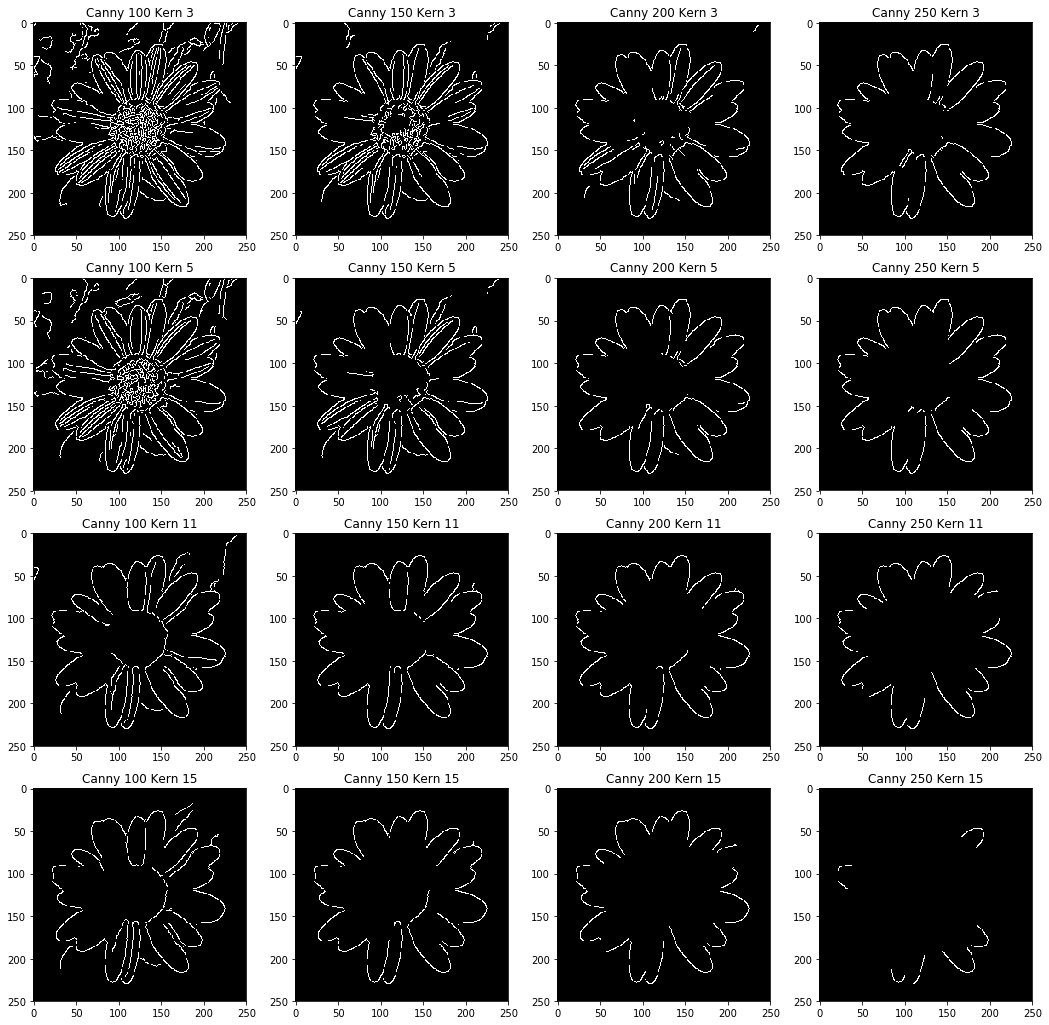

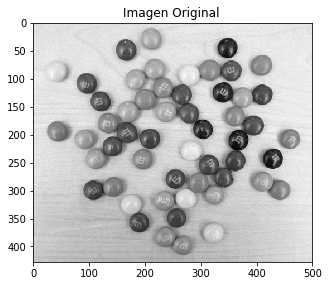

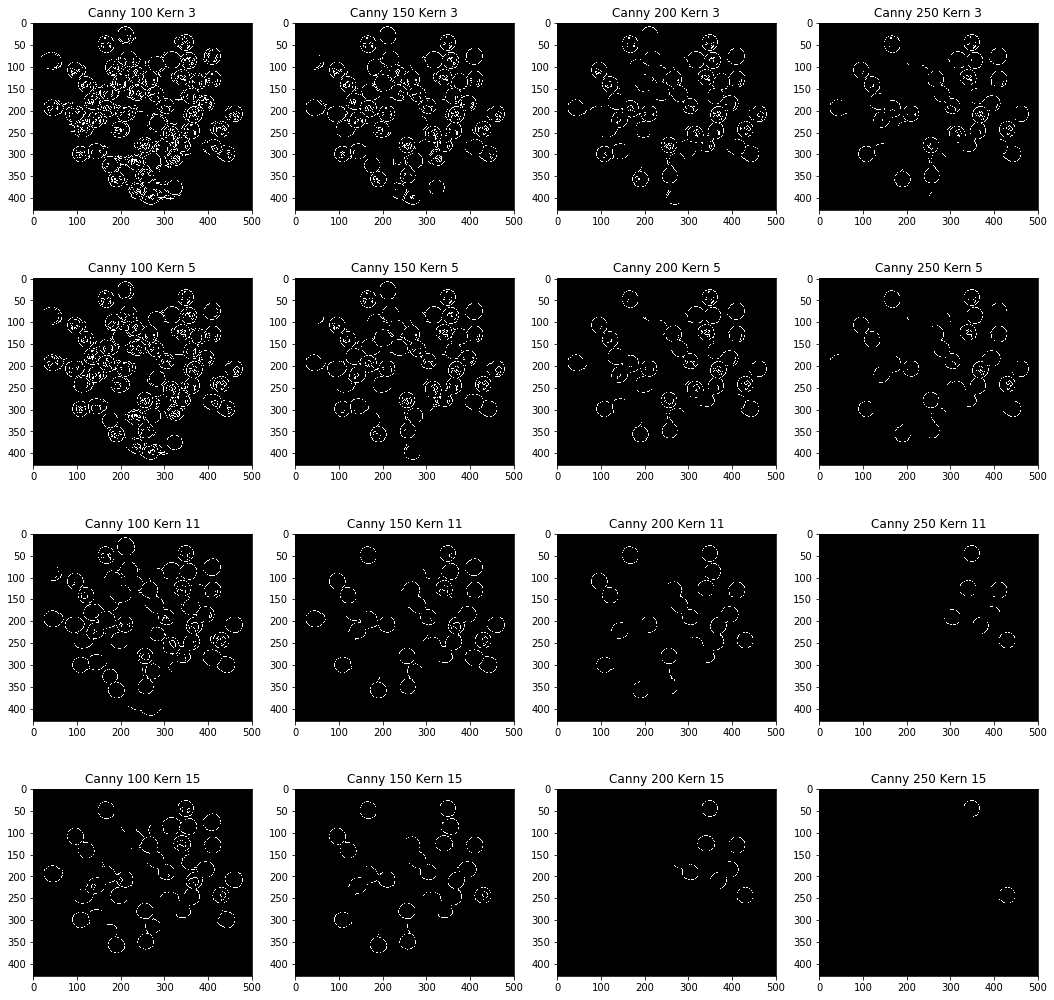

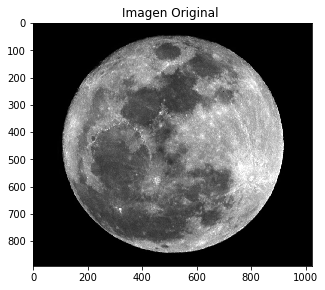

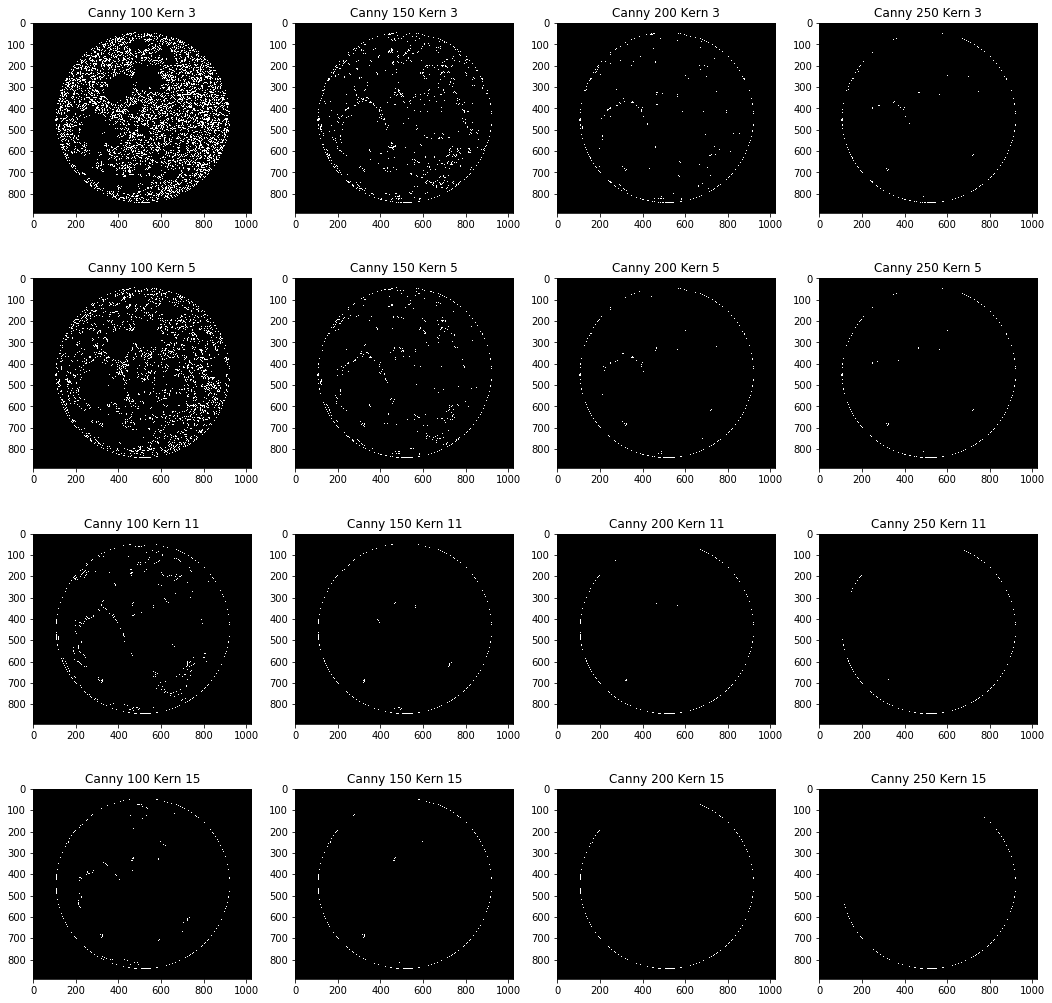

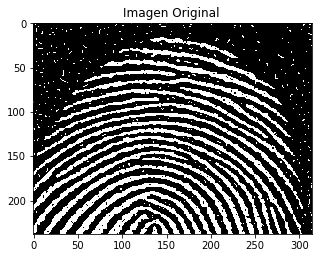

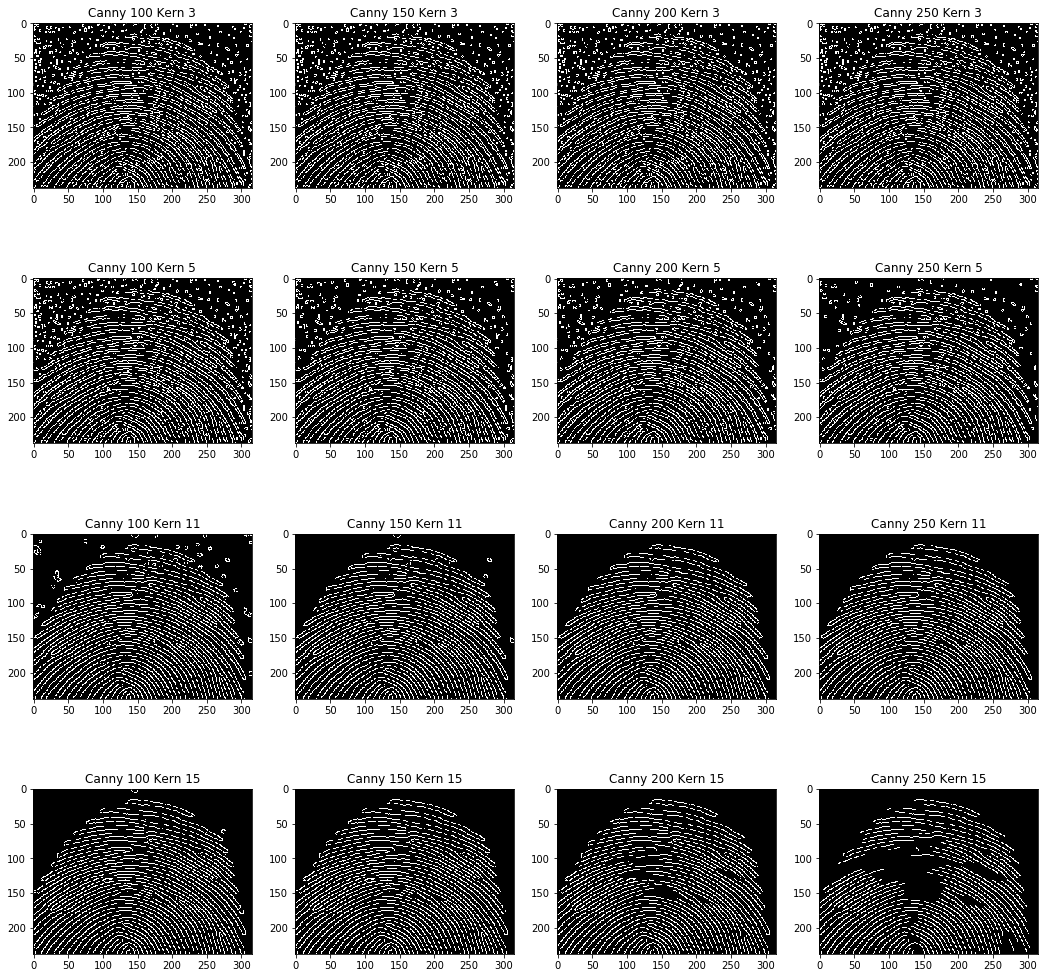

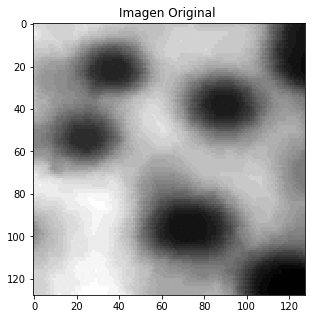

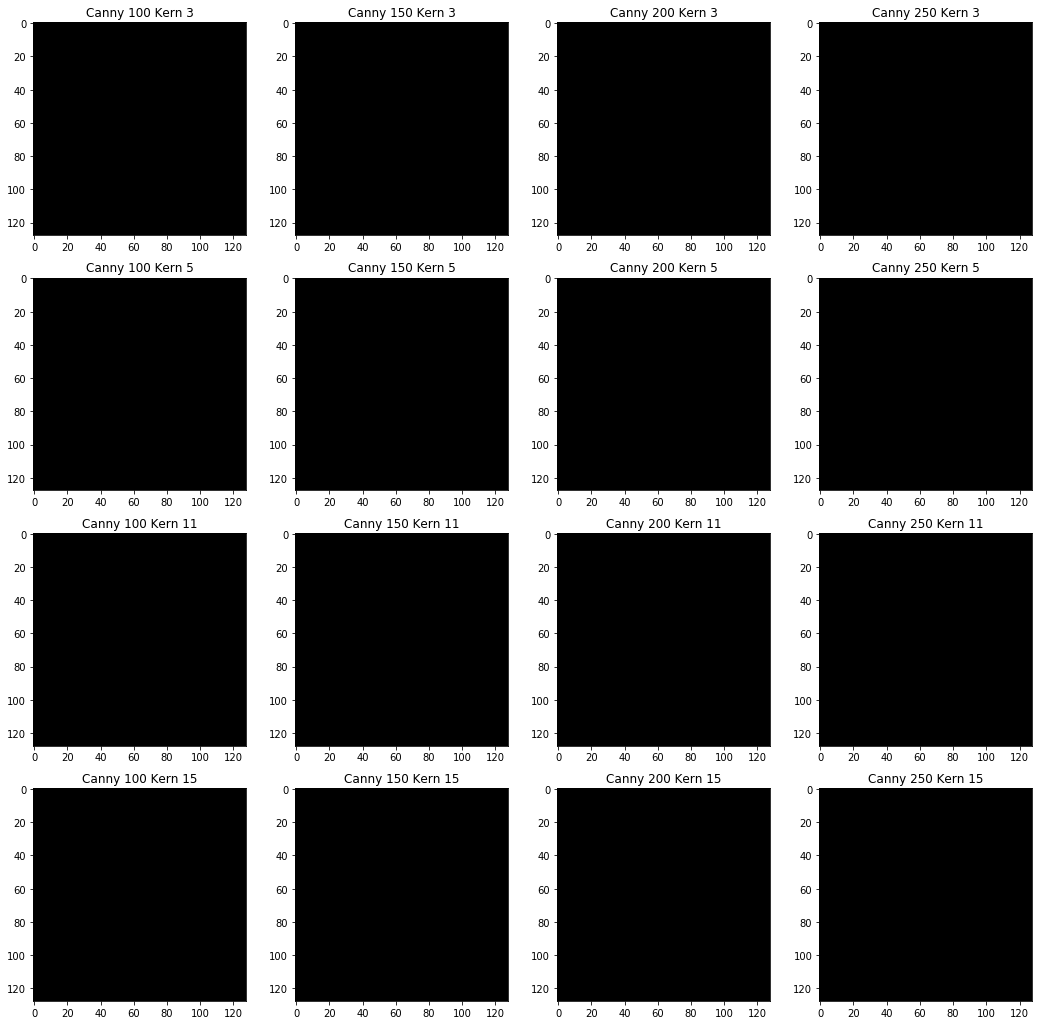

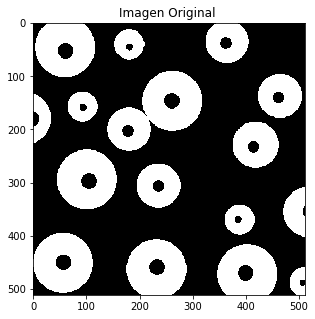

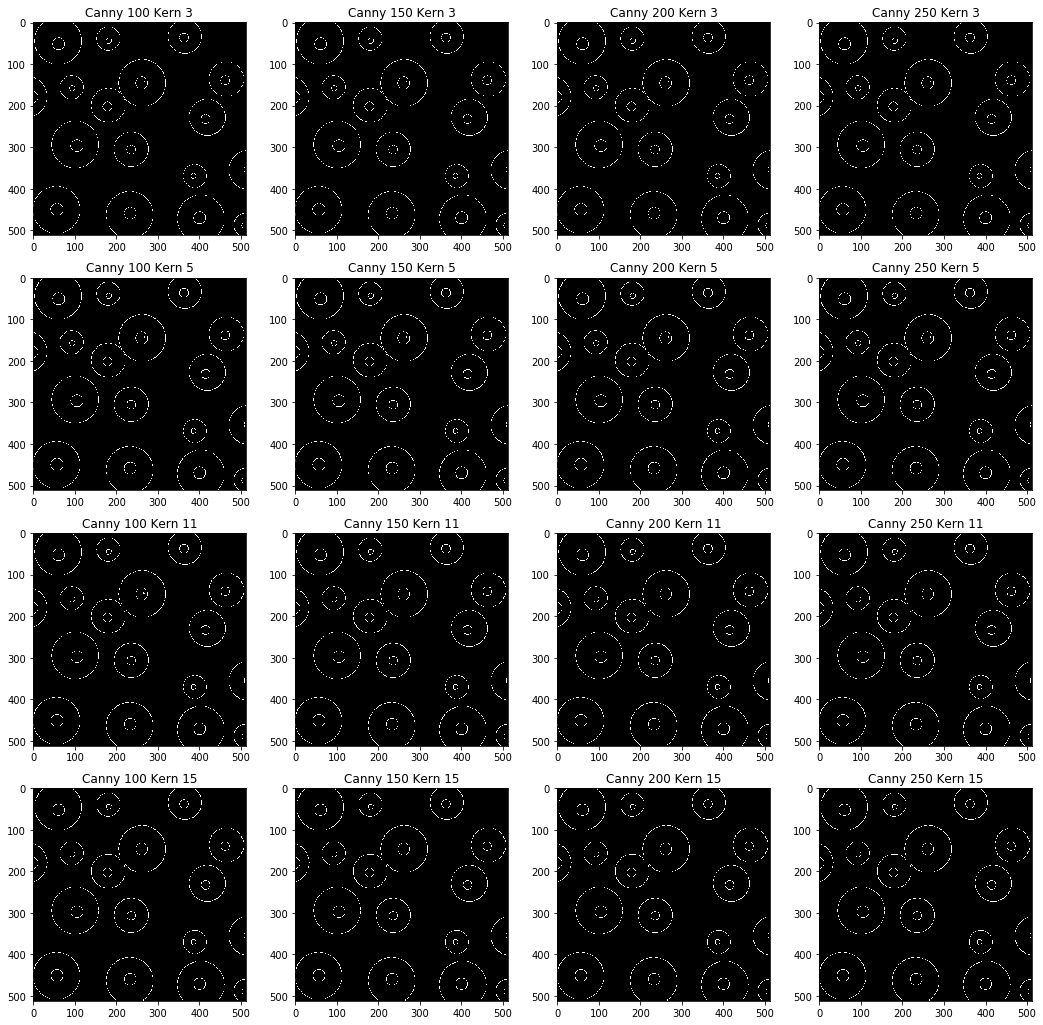

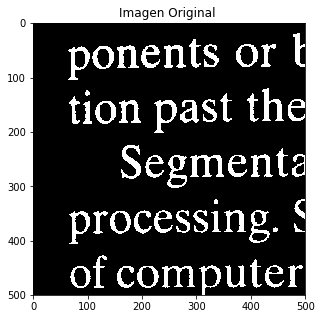

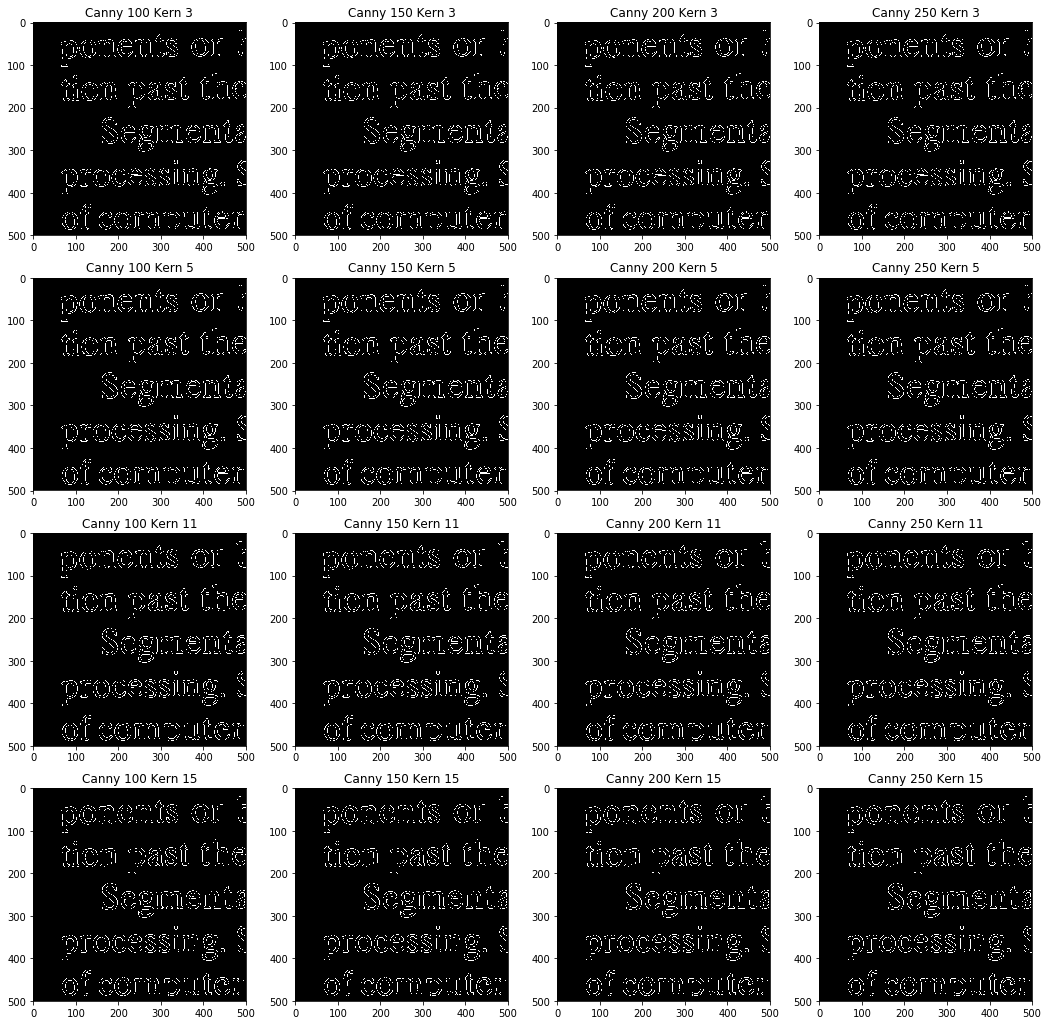

In [240]:
def edges(imag):
    m=1
    plt.figure(figsize=(18,18))
    for kern in [3, 5, 11, 15]:
        blur=cv2.GaussianBlur(imag,(kern,kern),0)
        t=1.0
        for  can in [100, 150, 200, 250]:
            edge = cv2.Canny(blur,can-80,can)
            plt.subplot(4,4,m)
            plt.title("Canny " + str(can) +" Kern "+str(kern)) 
            plt.imshow(edge, cmap = 'gray')
            m=m+1
            
    
for i,name in enumerate(filenames):
    img = cv2.imread("images/"+name,0);
    plt.figure(figsize=(5,5))
    plt.title("Imagen Original ")
    plt.imshow(img,cmap = 'gray')

    new=edges(img)
plt.show()

<p><em><strong>Funcionalidad del c&oacute;digo: </strong></em>Una funci&oacute;n suaviza una imagen de entrada con un kernel que var&iacute;a de tama&ntilde;o y se le aplica un detector de bordes con m&uacute;ltiples condiciones. As&iacute; entonces se obtienen varios resultados para ver c&oacute;mo afecta tanto el tama&ntilde;o del kernel de la funci&oacute;n de suavizado como los puntos que demarcan el funcionamiento del detector de bordes. Esto se encuentra dentro de un ciclo para que m&uacute;ltiples im&aacute;genes pasaran por el proceso y se pudiera ver el efecto del proceso en cada una de estas.</p>
<p><em><strong>Funciones empleadas y descripci&oacute;n: </strong></em></p>
<p>La funci&oacute;n <strong>cv2.Canny() </strong>sirve para detectar bordes sin tener el problema de ruido que se tiene al usar el laplaciano. Esta requiere como primer argumento la imagen a modificar y los siguientes dos n&uacute;meros que requiere como argumentos indican los umbrales seg&uacute;n los cuales se marcaran los bordes.</p>
<p><strong><em>Algo curioso:</em></strong> Se puede apreciar que tanto el tama&ntilde;o del kernel de la funci&oacute;n que suaviza la imagen como los umbrales para demarcar los bordes de la funci&oacute;n canny son extremadamente importantes. Esto no es para sorprenderse ya que si se utiliza un suavizado sobre la imagen los bordes se difuminan y son m&aacute;s dif&iacute;ciles de detectar, por lo que la imagen construida a partir de esta solo con bordes ira perdiendo resoluci&oacute;n. Lo mismo ocurre con la selecci&oacute;n de los umbrales, como estos determinan que valores se consideran suficientemente altos o bajos para ser bordes o no, al variarse hacen que m&aacute;s o menos detalles de la imagen sean incluidos en la gr&aacute;fica.</p>

## Problem 6

Write a function that uses the Hough Transform algorithm for line detection. You can use the implementation available in OpenCV <tt>cv2.HoughLines</tt> in your function. Note that this function returns lines in the $(\rho, \theta)$ space, so you need to perform the appropiate conversions before plotting them.

Run the line detection function on an edge map obtained using Canny's method. Display the detected lines on top of the input image. You should use several images for your tests, including <tt>building.jpg</tt>.

building.jpg


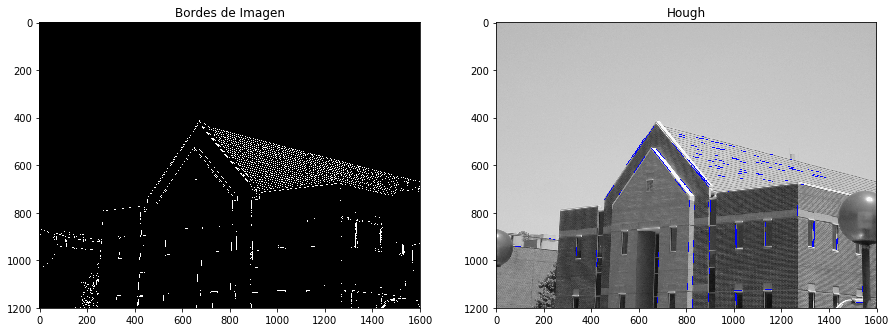

sudoku.jpg


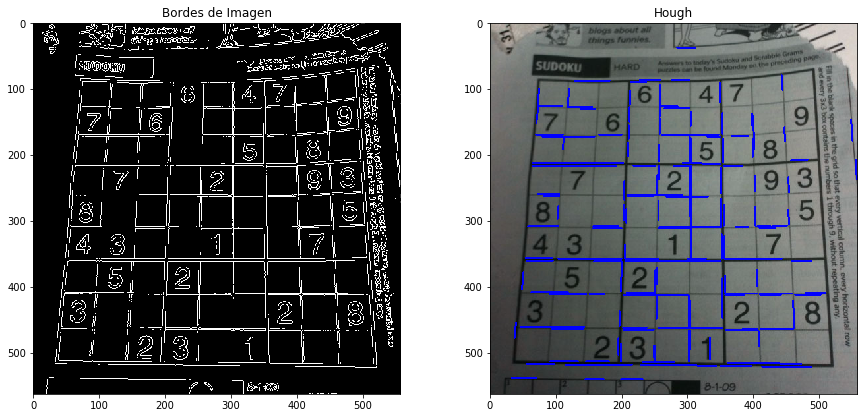

In [5]:
def hough(imag,p1,p2):
    gray = cv2.cvtColor(imag,cv2.COLOR_BGR2GRAY)
    """Se buscan los bordes de la imagen para que con esto se puedan buscar las lineas que se quieren representar"""

    edges = cv2.Canny(gray,p1,p2)
    lines = cv2.HoughLinesP(edges,1,np.pi/180,80,10,20)
    for line in lines: # para opencv3
        for x1,y1,x2,y2 in line: # para opencv2 solo line[0]
            cv2.line(imag,(x1,y1),(x2,y2),(0,0,255),2)
    return imag, edges

img_names = ["building.jpg", "sudoku.jpg"]
for name in img_names:
    print name
    img = cv2.imread("images/"+name)
    if name=="sudoku.jpg":
        ho, ed=hough(img,25,200)
    else:
        ho, ed=hough(img,200,250)
    plt.figure(figsize=(15,15))

    """Bordes Canny"""
    plt.subplot(2,2,1)
    plt.title("Bordes de Imagen")
    plt.imshow(ed, cmap='gray')

    """Bordes Hough"""
    plt.subplot(2,2,2)
    plt.title("Hough")
    plt.imshow(ho)

    plt.show()

<p><em><strong>Funcionalidad del c&oacute;digo: </strong></em>Una funci&oacute;n extrae los bordes de una imagen para posteriormente usar una funci&oacute;n de la transformada de Hough para detectar l&iacute;neas.</p>
<p><em><strong>Funciones empleadas y descripci&oacute;n: </strong></em></p>
<p>La funci&oacute;n <strong>cv2.HoughLinesP() </strong>sirve para detectar l&iacute;neas. Este necesita como primer argumento una imagen a la cual se le hayan detectado los bordes. Sus otros dos argumentos m&aacute;s importantes son los dos &uacute;ltimos, los cuales son el largo m&iacute;nimo de una l&iacute;nea para ser considerado y el espacio m&aacute;ximo entre segmentos para que se puedan considerar una sola l&iacute;nea.</p>
<p><strong><em>Para tener en cuenta:</em></strong> Cada imagen es diferente por lo que los par&aacute;metros tanto de la funci&oacute;n de Hough como los de detectar bordes de Canny puede que se deban ajustar seg&uacute;n la misma para poder obtener una salida satisfactoria.</p>

## Problem 7

Write a function that implements a simple adaptive thresholding algorithm as described below:

1. Select an initial estimate for $T$. A good initial value for $T$ would be equal to the average of the maximum and minimum intensity value of the image.
2. Threshold the image using $T$. This produces two groups: $G_1$, with pixels whose intensity is equal or less than $T$; and $G_2$, with pixels whose intensity is greater than $T$.
3. Compute the intensity averages $\mu_1$ and $\mu_2$ for the pixels in regions $G_1$ and $G_2$.
4. Compute a new threshold value
\begin{equation}
T=\frac{\mu_1 + \mu_2}{2}
\end{equation}

5. Repeat steps 2-4 until the difference in $T$ between successive iterations is less than a predefined parameter $T_0$.

Apply your function to the image <tt>fingerprint.jpg</tt>. Analyze your results.


fingerprint.jpg


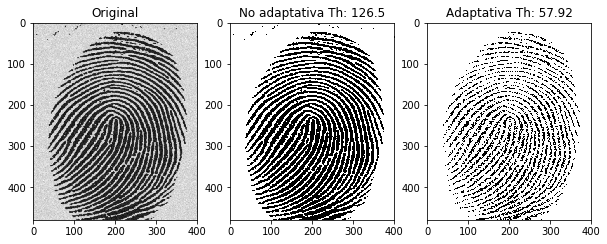

page.png


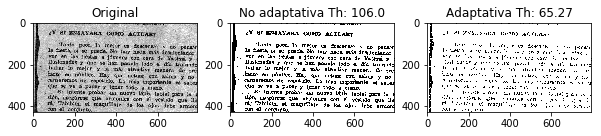

In [233]:
%matplotlib inline
def adaptative_th(image, T0):
    """ Función que hace una umbralización adaptativa simple.
    Input:  image: numpy array con la imagen (escala de grises).
    ======    T0: parámetro de th inicial
    
    Output:   out: numpy array con la imagen transformada.
    ======
    """
    _, img_th = cv2.threshold(image, T0, 255, cv2.THRESH_BINARY) # 2
    u1 = np.mean(img_th*image); u2 = np.mean((255-img_th)*image) # 3
    T = (u1 + u2)/2                                              # 4
    if np.abs(T - T0) > 1e-12: # Error para iteración
        return Adaptative_Thresholding(image, T)                 # 5
    else:
        _, out = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)
        return out,T

img_names = ["fingerprint.jpg", "page.png"]
for name in img_names:
    print name
    img = cv2.imread("images/"+name, cv2.IMREAD_GRAYSCALE)
    Ts = (np.max(img)+np.min(img))/2.0
    img2,Te = adaptative_th(img, Ts)
    _, img3 = cv2.threshold(img, Ts, 255, cv2.THRESH_BINARY)
    plt.figure(figsize=(10,10));    
    plt.subplot(1,3,1); plt.imshow(img, cmap = 'gray');plt.title('Original');
    plt.subplot(1,3,2); plt.imshow(img3, cmap = 'gray');plt.title('No adaptativa Th: '+str(Ts));
    plt.subplot(1,3,3); plt.imshow(img2, cmap = 'gray');plt.title('Adaptativa Th: '+str(np.round(Te,2)));
    plt.show()

<p><em><strong>Funcionalidad:</strong></em> Una imagen es leída e ingresada a la función adaptative_th de donde se obtendrá la imagen umbralizada con el método de umbralización adaptativo simple. Esto se repite para cada imagen en una lista previamente definida.</p>
    
<p><em><strong>Funciones usadas y descripciones:</strong></em> El comportamiento de este código se basa en los pasos descritos para este problema: <br><br>
1. Se selecciona un valor inicial de $T$. Que será el promedio entre el valor de intensidad mínimo y máximo de la imagen tal como se sugería en la descripción del problema.<br>
Se llama la función adaptative_th con la imagen y el valor de T previamente calculado. La función realizará los pasos descritos a continuación: <br>
2. Se hallan las regiones $G_1$ y $G_2$, que representan respectivamente la región donde los pixeles tienen intensidades menores o iguales que $T$ y la región de pixeles con intensidades mayores que el umbral inicial. $G_1$ s se obtiene usando la función de umbralización de opencv indicando una umbralización binaria y $G_2$ corresponde al complemento de  $G_1$.<br>
3. Se calculan los promedios de intesidades $\mu_1$ y $\mu_2$ para cada región. Esto se hace con la función de numpy mean().<br>
4. Se calcula el nuevo valor del umbral promediando los promedios previamente calculados:
\begin{equation}
T=\frac{\mu_1 + \mu_2}{2}
\end{equation}
5. Se evalua la condición de convergencia del método iterativo ($T$-$T_0$ < $1p$) Escogiendo 1 pico como error mínimo para declarar convergencia. Si esta existe entonces se termina evaluando la umbralización con el $T$ calculado y si no hay convergencia entonces se llama a la misma función para así hacer el método iterativo.<br></p>

<p><strong><em>An&aacute;lisis:</em></strong> En los resultados se grafican la imagen original, la umbralizada con el umbral incial (punto 1) y la obtenida con la función adaptative_th junto con sus respectivos umbrales. Vemos como los detalles en la umbralización adaptativa son más finos resaltando mejor los datos de interés y despreciando los ruidosos. Esto se ve en la imagen de la huella, ya que los puntos en la parte superior de esta desaparecen. Y en la imagen de la página del libro se minimizan los de la parte izquierda y superior derecha.

<p><strong><em>Algo curioso:</em></strong> Decidimos usar una imagen de una página puesto que los resultados nos recordaron a los que se usan en los software de escaneo e incluso en los que no se usa un escáner si no la cámara de un teléfono inteligente.</p>

## Problem 8

Write a function that uses the $k$-means algorithm to perform image segmentation using RGB pixel colors as features.
Write also a variant of this segmentation approach that uses the H and S components of each pixel represented in the HSI color space. Here, you should use normalized H and S values, so that both variables range between 0 and 1.
Apply your functions to the image <tt>mms.jpg</tt>. Select an appropriate value of $k$.


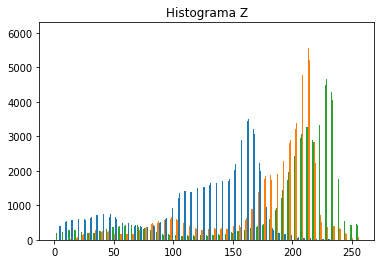

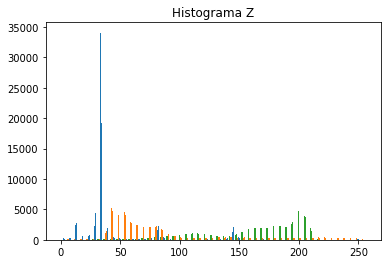

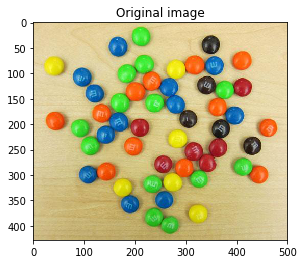

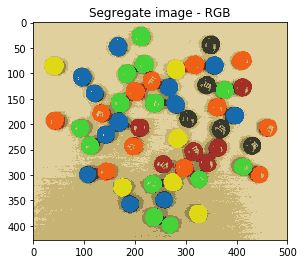

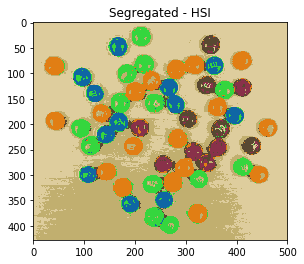

In [4]:
def segmentate(image,k):
    """ Función que segmenta una imagen en k grupos
    Input:  image: numpy array con la imagen (3 canales).
    ======      k: número de grupos a agrupar.
    
    Output:   out: numpy array con la imagen segmentada.
    ======
    """
    Z = image.reshape((-1,3)) # reordena matriz
    Z = np.float32(Z) # convierte a float32
    plt.figure(); plt.hist(Z,256,[0,256]); plt.title("Histograma Z"); plt.show()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _,label,center=cv2.kmeans(Z,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # para OpenCV V3
    #_,label,center=cv2.kmeans(Z,k,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # para OpenCV V2
    
    center = np.uint8(center) # convierte a uint8
    res = center[label.flatten()]
    out = res.reshape((image.shape)) # reordena matriz a orden original
    return out
 
img =  cv2.imread("images/mms.jpg")
agrRGB = segmentate(img,9)

h,s,i = bgr2hsi(img) # convert the image to HSI
Nimg_HSI = cv2.merge((h/np.max(h)*255,s*255,i*255)).astype('uint8')
agrHSI = segmentate(Nimg_HSI,7)
h3,s3,i3 = cv2.split(agrHSI)
agrHSI_rgb = hsi2rgb(h3/255.0 * np.max(h),s3/255.0,i3/255.0) # convierte a RGB para mostrarla

plt.figure(); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original image");
plt.figure(); plt.imshow(cv2.cvtColor(agrRGB, cv2.COLOR_BGR2RGB)); plt.title("Segregate image - RGB");
plt.figure(); plt.imshow(agrHSI_rgb); plt.title("Segregated - HSI");

<p><em><strong>Funcionalidad y descripción del código:</strong></em> La función segmentate() permite segmentar un imagen a color en formato RGB y HSI declarando el número de grupos en el que se quiere agrupar.
<br>Para ello se empieza reordenando los tres canales en una sola variable vertical (ver Histograma Z) para así ingresar mejor los datos a la función de opencv que realiza el algoritmo de agrupamiento. Este último corresponde a <strong>cv2.kmeas()</strong> cuyos parametros son la matriz de datos de entrada, número de grupos, el criterio de terminación del método iterativo, el número de iteraciones máximo, y los puntos inciales de centros del método k-means.
<br>
Las salidas de esta función corresponden a los centros obtenidos con el método y a las etiquetas o labels que se les da para asignar una categoría a un centro. La imagen segmentada se obtendrá relacionando esas categorías con sus correpondientes centros. Cabe resaltar que los datos son previamente reestructurados a formato float32 para su compatibilidad con la función cv2.kmeans() y por lo tanto hay que formatearlos al formato de imagen original uint8. Para finalizar se reordenan los datos a la forma de la imagen original para su correcta visualización.

<p><strong><em>Análisis:</em></strong> 
Para usar la función segmentate() es necesario entregar un numpy array con formato uint8 con tres canales y el número de grupos que desea. Para el caso de la imagen en RGB no fue necesario realizar ningún preprocesamiento. Para la imagen en HSI fue necesario llevar cada canal a la escala de 0 a 255 niveles de intensidad, por lo tanto la matriz H se normalizó y multiplicó por 255 ya que el conversor da valores de intensidad de 0 a 2$\pi$ y las matrices S e I se multiplicaron por 255 ya que ya estaban de 0 a 1. Como se manipula la imagen HSI antes de ingresar a segmentate(), se requiere deshacer estos cambios en la salida de segmentate() para devolver la salida al formato HSI que admite el conversor hsi2rgb(), es decir que la matriz H de salida se tiene que normalizar y multiplicar por 2$\pi$ y las matrices S e I se deben normalizar.<br>
Con respecto al número de grupos, para la imagen usada se observa que hay 6 colores de m&ms (verde, azul, amarillo, negro, naranja, rojo) y contando el fondo como otro grupo, se tendrían mínimo k=7 para probar la función. Para el caso de RGB se usó k=8 porque para k=7 los m&ms rojos se integraban con los naranjas. Y es que en el caso de k=7 la categoría extra no requerida correspondía al fondo de madera de la parte inferior central, la cual tiene una tonalidad más oscura que el resto del fondo. Así que colocando un grupo de más fue suficiente para conseguir el resultado deseado.
<br>
El rendimiento de la segregación usando el formato HSI es mejor, por lo que con k=7 fue suficiente para distinguir los seis colores de m&ms. Sin embargo la calidad de la agrupación no es muy convincente ya que las partes donde se ve el brillo en los dulces no les asigna la misma categoría del color del dulce sino la del fondo u otro color.
<br><br>
En general consideramos que la segregación usando la imagen RGB es mejor porque da una apariencia más uniforme del color para cada grupo, en cambio que con HSI es más detallista y por lo tanto la integridad del color no se aprecia en partes muy claras de un mismo elemento. Además la conversión de la imagen a HSI requiere más tiempo de procesamiento y puede existir pérdida de datos en estas transformaciones.
</p>
<p><strong><em>Nota:</em></strong> Para realizar la función segmentate usamos de apoyo la guía de opencv sobre clustering <a href="http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html">(1)</a>. Además los conversores de bgr2hsi() y hsi2rgb() son los conversores hechos en el taller anterior, con algunas mejoras en su rendimiento debido al uso de opencv para la asignación de las matrices y no con la estándar de python usada en el taller anterior.